In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
import datetime

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping


In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.layers import RepeatVector

In [13]:

from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
#file = '/content/drive/MyDrive/Colab Notebooks/data_processed.csv'
#file = '/content/drive/MyDrive/Colab Notebooks/data_processed2.csv'
#file = '/content/drive/MyDrive/Colab Notebooks/knn_output.csv'

file1 = '/content/drive/MyDrive/Colab Notebooks/ensemble_out.csv'
#file = '/content/drive/MyDrive/Colab Notebooks/knn_output_2.csv'
file2 = '/content/drive/MyDrive/Colab Notebooks/knn_output_3.csv'

In [16]:
ensemble=pd.read_csv(file1)
knn=pd.read_csv(file2)


In [ ]:

#df['Time'] = pd.to_datetime(df['Time'])
#df['Time'] = df['Time'].apply(lambda x: datetime.datetime.timestamp(x))




In [ ]:
#df['PV_kwAC_out_Norm'].describe()
#data=df

#data=df[['Time','Solar','Ghi_norm','GtiFixedTilt_norm','Zenith_norm','GtiTracking_norm','PV_kwAC_out_Norm']]
#data = data.drop(data.columns[0], axis=1)
#data

In [ ]:
#dd=df['PV_kwAC_out_Norm']
##data=df
#data = data.drop(data.columns[1], axis=1)
#data = pd.concat([data, dd], axis=1)
#dd=df['Community_Load']
#data = data.drop(data.columns[1], axis=1)
#data = pd.concat([data, dd], axis=1)
#data = data.drop(data.columns[0], axis=1)
#data

In [17]:
#concatenate two dataframe into one and change order of columns
data = pd.concat([knn, ensemble], axis=1, ignore_index=False)
data = data.loc[:, ~data.columns.duplicated()]
data = data.assign(LMP_Norm=data.pop('LMP_Norm'),Community_Load=data.pop('Community_Load'), PV_kwAC_out_Norm=data.pop('PV_kwAC_out_Norm') )
data

,Time,Congestion_Norm,Small Hydro,Energy_Norm,Loss_Norm,Biogas,Geothermal,Gas Price,Load,Biomass,...,Solar,Azimuth_norm,GtiFixedTilt_norm,GtiTracking_norm,Zenith_norm,Ghi_norm,solar_system_Curtailment (MWh),LMP_Norm,Community_Load,PV_kwAC_out_Norm
0,2021-01-01 00:00:00,0.301568,0.042874,0.029449,0.378454,0.827869,0.845406,0.063428,0.462537,0.736842,...,0.002997,0.447293,0.0,0.0,1.000000,0.0,0.0,0.102169,0.564142,0.0
1,2021-01-01 01:00:00,0.301568,0.042572,0.027973,0.378942,0.831967,0.844523,0.063428,0.516118,0.736842,...,0.002997,0.339031,0.0,0.0,0.953333,0.0,0.0,0.100805,0.453677,0.0
2,2021-01-01 02:00:00,0.301568,0.042874,0.028818,0.380648,0.827869,0.844523,0.063428,0.524276,0.741627,...,0.002997,0.284900,0.0,0.0,0.880000,0.0,0.0,0.101690,0.516479,0.0
3,2021-01-01 03:00:00,0.301568,0.044686,0.028287,0.380369,0.827869,0.841873,0.063428,0.509237,0.734450,...,0.002928,0.250712,0.0,0.0,0.800000,0.0,0.0,0.101175,0.522249,0.0
4,2021-01-01 04:00:00,0.301568,0.053140,0.029238,0.381814,0.827869,0.845406,0.063428,0.493290,0.732057,...,0.002858,0.225071,0.0,0.0,0.720000,0.0,0.0,0.102145,0.574758,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2022-12-31 19:00:00,0.301568,0.065821,0.108320,0.425120,0.877049,0.795936,0.275904,0.448827,0.574163,...,0.003973,0.774929,0.0,0.0,0.693333,0.0,0.0,0.178786,0.470584,0.0
17516,2022-12-31 20:00:00,0.301568,0.064312,0.104586,0.415743,0.877049,0.795053,0.275904,0.453955,0.605263,...,0.003904,0.749288,0.0,0.0,0.773333,0.0,0.0,0.174785,0.534308,0.0
17517,2022-12-31 21:00:00,0.301568,0.062500,0.099013,0.409350,0.877049,0.795053,0.275904,0.455645,0.684211,...,0.003346,0.720798,0.0,0.0,0.853333,0.0,0.0,0.169210,0.402862,0.0
17518,2022-12-31 22:00:00,0.301568,0.060688,0.093832,0.401280,0.864754,0.795053,0.275904,0.459283,0.686603,...,0.003276,0.675214,0.0,0.0,0.926667,0.0,0.0,0.163917,0.470848,0.0


In [18]:
#dataframe for Community_Load
data_CL=data[['Congestion_Norm', 'Small Hydro', 'Energy_Norm', 'Loss_Norm','Biogas', 'Geothermal', 'Gas Price', 'Load', 'Biomass','Regulation Up Total (MW)',  'Batteries', 'AlbedoDaily_norm','WindSpeed10m_norm', 'Load','Non-Spinning Reserves Total (MW)','Total Volume(MW)','Load_Forecast_Norm','Solar','Community_Load']]
data_CL


,Congestion_Norm,Small Hydro,Energy_Norm,Loss_Norm,Biogas,Geothermal,Gas Price,Load,Biomass,Regulation Up Total (MW),Batteries,AlbedoDaily_norm,WindSpeed10m_norm,Load,Non-Spinning Reserves Total (MW),Total Volume(MW),Load_Forecast_Norm,Solar,Community_Load
0,0.301568,0.042874,0.029449,0.378454,0.827869,0.845406,0.063428,0.462537,0.736842,0.163363,0.431818,0.75,0.185185,0.462537,0.681852,0.483761,0.185736,0.002997,0.564142
1,0.301568,0.042572,0.027973,0.378942,0.831967,0.844523,0.063428,0.516118,0.736842,0.160177,0.435933,0.50,0.148148,0.516118,0.668012,0.468434,0.164058,0.002997,0.453677
2,0.301568,0.042874,0.028818,0.380648,0.827869,0.844523,0.063428,0.524276,0.741627,0.158393,0.431426,0.50,0.148148,0.524276,0.674470,0.465203,0.148804,0.002997,0.516479
3,0.301568,0.044686,0.028287,0.380369,0.827869,0.841873,0.063428,0.509237,0.734450,0.160517,0.419867,0.50,0.172840,0.509237,0.676931,0.461707,0.135589,0.002928,0.522249
4,0.301568,0.053140,0.029238,0.381814,0.827869,0.845406,0.063428,0.493290,0.732057,0.170003,0.423002,0.50,0.160494,0.493290,0.653557,0.457781,0.133822,0.002858,0.574758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,0.301568,0.065821,0.108320,0.425120,0.877049,0.795936,0.275904,0.448827,0.574163,0.398107,0.631466,0.00,0.543210,0.448827,0.484192,0.516124,0.291031,0.003973,0.470584
17516,0.301568,0.064312,0.104586,0.415743,0.877049,0.795053,0.275904,0.453955,0.605263,0.439549,0.571904,0.00,0.530864,0.453955,0.467953,0.532832,0.268299,0.003904,0.534308
17517,0.301568,0.062500,0.099013,0.409350,0.877049,0.795053,0.275904,0.455645,0.684211,0.460745,0.470415,0.00,0.555556,0.455645,0.453362,0.531816,0.250837,0.003346,0.402862
17518,0.301568,0.060688,0.093832,0.401280,0.864754,0.795053,0.275904,0.459283,0.686603,0.387049,0.507837,0.00,0.567901,0.459283,0.436748,0.507318,0.229487,0.003276,0.470848


In [19]:
#dataframe for LMP_Norm
data_LMP=data[['Small Hydro', 'Loss_Norm','Biogas', 'Geothermal', 'Gas Price', 'Load', 'Biomass','Regulation Up Total (MW)', 'Non-Spinning Reserves Total (MW)','Total Volume(MW)', 'Batteries', 'AlbedoDaily_norm','WindSpeed10m_norm','Load_Forecast_Norm','Natural Gas','Energy_Norm','Congestion_Norm','RelativeHumidity_norm','LMP_Norm']]
data_LMP

,Small Hydro,Loss_Norm,Biogas,Geothermal,Gas Price,Load,Biomass,Regulation Up Total (MW),Non-Spinning Reserves Total (MW),Total Volume(MW),Batteries,AlbedoDaily_norm,WindSpeed10m_norm,Load_Forecast_Norm,Natural Gas,Energy_Norm,Congestion_Norm,RelativeHumidity_norm,LMP_Norm
0,0.042874,0.378454,0.827869,0.845406,0.063428,0.462537,0.736842,0.163363,0.681852,0.483761,0.431818,0.75,0.185185,0.185736,0.296277,0.029449,0.301568,0.829348,0.102169
1,0.042572,0.378942,0.831967,0.844523,0.063428,0.516118,0.736842,0.160177,0.668012,0.468434,0.435933,0.50,0.148148,0.164058,0.275281,0.027973,0.301568,0.831522,0.100805
2,0.042874,0.380648,0.827869,0.844523,0.063428,0.524276,0.741627,0.158393,0.674470,0.465203,0.431426,0.50,0.148148,0.148804,0.254777,0.028818,0.301568,0.825000,0.101690
3,0.044686,0.380369,0.827869,0.841873,0.063428,0.509237,0.734450,0.160517,0.676931,0.461707,0.419867,0.50,0.172840,0.135589,0.245412,0.028287,0.301568,0.825000,0.101175
4,0.053140,0.381814,0.827869,0.845406,0.063428,0.493290,0.732057,0.170003,0.653557,0.457781,0.423002,0.50,0.160494,0.133822,0.253115,0.029238,0.301568,0.827174,0.102145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,0.065821,0.425120,0.877049,0.795936,0.275904,0.448827,0.574163,0.398107,0.484192,0.516124,0.631466,0.00,0.543210,0.291031,0.339665,0.108320,0.301568,0.875000,0.178786
17516,0.064312,0.415743,0.877049,0.795053,0.275904,0.453955,0.605263,0.439549,0.467953,0.532832,0.571904,0.00,0.530864,0.268299,0.325278,0.104586,0.301568,0.878261,0.174785
17517,0.062500,0.409350,0.877049,0.795053,0.275904,0.455645,0.684211,0.460745,0.453362,0.531816,0.470415,0.00,0.555556,0.250837,0.333359,0.099013,0.301568,0.888043,0.169210
17518,0.060688,0.401280,0.864754,0.795053,0.275904,0.459283,0.686603,0.387049,0.436748,0.507318,0.507837,0.00,0.567901,0.229487,0.350238,0.093832,0.301568,0.884783,0.163917


In [20]:
#dataframe for PV_kwAC_out_Norm

data_PV=data[['Congestion_Norm', 'Small Hydro', 'Energy_Norm', 'Loss_Norm','Biogas', 'Geothermal', 'Gas Price', 'Load', 'Biomass','Regulation Up Total (MW)', 'Non-Spinning Reserves Total (MW)','Total Volume(MW)', 'Batteries', 'AlbedoDaily_norm','WindSpeed10m_norm','Solar','Azimuth_norm','GtiFixedTilt_norm','Zenith_norm','GtiTracking_norm','PV_kwAC_out_Norm']]
data_PV

,Congestion_Norm,Small Hydro,Energy_Norm,Loss_Norm,Biogas,Geothermal,Gas Price,Load,Biomass,Regulation Up Total (MW),...,Total Volume(MW),Batteries,AlbedoDaily_norm,WindSpeed10m_norm,Solar,Azimuth_norm,GtiFixedTilt_norm,Zenith_norm,GtiTracking_norm,PV_kwAC_out_Norm
0,0.301568,0.042874,0.029449,0.378454,0.827869,0.845406,0.063428,0.462537,0.736842,0.163363,...,0.483761,0.431818,0.75,0.185185,0.002997,0.447293,0.0,1.000000,0.0,0.0
1,0.301568,0.042572,0.027973,0.378942,0.831967,0.844523,0.063428,0.516118,0.736842,0.160177,...,0.468434,0.435933,0.50,0.148148,0.002997,0.339031,0.0,0.953333,0.0,0.0
2,0.301568,0.042874,0.028818,0.380648,0.827869,0.844523,0.063428,0.524276,0.741627,0.158393,...,0.465203,0.431426,0.50,0.148148,0.002997,0.284900,0.0,0.880000,0.0,0.0
3,0.301568,0.044686,0.028287,0.380369,0.827869,0.841873,0.063428,0.509237,0.734450,0.160517,...,0.461707,0.419867,0.50,0.172840,0.002928,0.250712,0.0,0.800000,0.0,0.0
4,0.301568,0.053140,0.029238,0.381814,0.827869,0.845406,0.063428,0.493290,0.732057,0.170003,...,0.457781,0.423002,0.50,0.160494,0.002858,0.225071,0.0,0.720000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,0.301568,0.065821,0.108320,0.425120,0.877049,0.795936,0.275904,0.448827,0.574163,0.398107,...,0.516124,0.631466,0.00,0.543210,0.003973,0.774929,0.0,0.693333,0.0,0.0
17516,0.301568,0.064312,0.104586,0.415743,0.877049,0.795053,0.275904,0.453955,0.605263,0.439549,...,0.532832,0.571904,0.00,0.530864,0.003904,0.749288,0.0,0.773333,0.0,0.0
17517,0.301568,0.062500,0.099013,0.409350,0.877049,0.795053,0.275904,0.455645,0.684211,0.460745,...,0.531816,0.470415,0.00,0.555556,0.003346,0.720798,0.0,0.853333,0.0,0.0
17518,0.301568,0.060688,0.093832,0.401280,0.864754,0.795053,0.275904,0.459283,0.686603,0.387049,...,0.507318,0.507837,0.00,0.567901,0.003276,0.675214,0.0,0.926667,0.0,0.0


In [21]:
#data_CL=data[['Load','Non-Spinning Reserves Total (MW)','Total Volume(MW)','Load_Forecast_Norm','Solar','Community_Load']]
#data_LMP=data[['Load_Forecast_Norm','Natural Gas','Energy_Norm','Congestion_Norm','RelativeHumidity_norm','LMP_Norm']]
#data_PV=data[['Solar','Azimuth_norm','GtiFixedTilt_norm','Zenith_norm','GtiTracking_norm','PV_kwAC_out_Norm']]

In [22]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)
time_steps = 1

In [23]:
train_size = int(len(data) * 0.7)

train_data_LMP = data_LMP.iloc[:train_size]
test_data_LMP = data_LMP.iloc[train_size:]

train_data_PV = data_PV.iloc[:train_size]
test_data_PV = data_PV.iloc[train_size:]

train_data_CL = data_CL.iloc[:train_size]
test_data_CL = data_CL.iloc[train_size:]

In [24]:
X_train_3, y_train_3 = create_dataset(train_data_LMP.iloc[:, :-1], train_data_LMP.iloc[:, -1:], time_steps)  #LMP_Norm
X_train_2, y_train_2 = create_dataset(train_data_PV.iloc[:, :-1], train_data_PV.iloc[:, -1:], time_steps)#PV_kwAC_out_Norm
X_train_1, y_train_1 = create_dataset(train_data_CL.iloc[:, :-1], train_data_CL.iloc[:, -1:], time_steps)#Community_Load

X_test_3, y_test_3 = create_dataset(test_data_LMP.iloc[:, :-1], test_data_LMP.iloc[:, -1:], time_steps)
X_test_2, y_test_2 = create_dataset(test_data_PV.iloc[:, :-1], test_data_PV.iloc[:, -1:], time_steps)
X_test_1, y_test_1 = create_dataset(test_data_CL.iloc[:, :-1], test_data_CL.iloc[:, -1:], time_steps)

In [25]:
#X_train, y_train_3 = create_dataset(train_data.iloc[:, :-3], train_data.iloc[:, -3:-2], time_steps)  #LMP_Norm
#X_train, y_train_2 = create_dataset(train_data.iloc[:, :-3], train_data.iloc[:, -2:-1], time_steps)#PV_kwAC_out_Norm
#X_train, y_train_1 = create_dataset(train_data.iloc[:, :-3], train_data.iloc[:, -1:], time_steps)#Community_Load

##X_test, y_test_3 = create_dataset(test_data.iloc[:, :-3], test_data.iloc[:, -3:-2], time_steps)
#X_test, y_test_2 = create_dataset(test_data.iloc[:, :-3], test_data.iloc[:, -2:-1], time_steps)
#X_test, y_test_1 = create_dataset(test_data.iloc[:, :-3], test_data.iloc[:, -1:], time_steps)

In [ ]:
#model1 = Sequential()
#model1.add((LSTM(200, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]) , return_sequences=True)))
#model1.add(TimeDistributed(Dense(100)))
#model1.add(TimeDistributed(Dense(64)))
#model1.add(TimeDistributed(Dense(32)))
#model1.add(TimeDistributed(Dense(1, activation='linear')))
#model1.compile(loss='mse', optimizer='adam')


model1 = Sequential()
model1.add(LSTM(256, activation='tanh', input_shape=(X_train_1.shape[1], X_train_1.shape[2]), return_sequences=True))
model1.add(Dropout(0.2))
model1.add(TimeDistributed(Dense(128, activation='relu')))
model1.add(Dropout(0.2))
model1.add(TimeDistributed(Dense(64, activation='relu')))
model1.add(Dropout(0.2))
model1.add(TimeDistributed(Dense(1, activation='linear')))
model1.compile(loss='mse', optimizer='adam')

# define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, mode='min', restore_best_weights=True)
history1=model1.fit(X_train_1, y_train_1, epochs=200, batch_size=16,  validation_split=0.1, verbose=1,callbacks=[early_stopping]) # [y_train_1, y_train_2, y_train_3]

Epoch 1/200
690/690 [==============================] - 13s 6ms/step - loss: 0.0104 - val_loss: 0.0056
Epoch 2/200
690/690 [==============================] - 3s 5ms/step - loss: 0.0057 - val_loss: 0.0046
Epoch 3/200
690/690 [==============================] - 4s 5ms/step - loss: 0.0052 - val_loss: 0.0043
Epoch 4/200
690/690 [==============================] - 5s 7ms/step - loss: 0.0050 - val_loss: 0.0043
Epoch 5/200
690/690 [==============================] - 3s 5ms/step - loss: 0.0048 - val_loss: 0.0041
Epoch 6/200
690/690 [==============================] - 3s 5ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 7/200
690/690 [==============================] - 4s 5ms/step - loss: 0.0045 - val_loss: 0.0040
Epoch 8/200
690/690 [==============================] - 4s 6ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 9/200
690/690 [==============================] - 3s 5ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 10/200
690/690 [==============================] - 4s 5ms/step - loss: 0.0043 - val_l

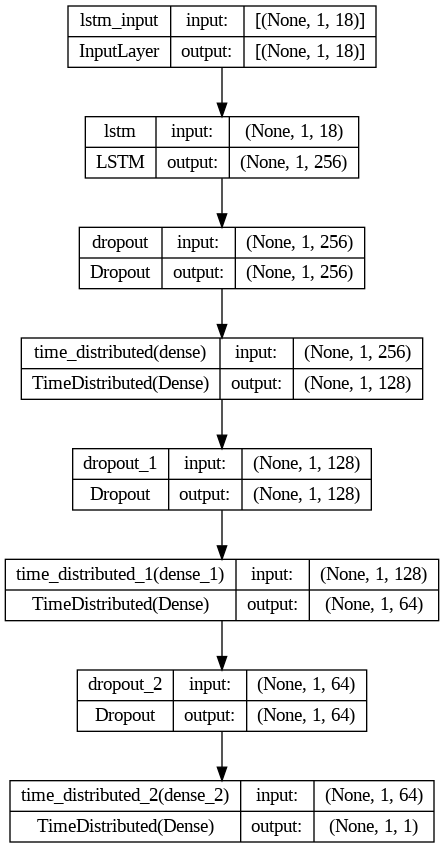

In [ ]:
from keras.utils import plot_model
plot_model(model1, to_file='lstm.png', show_shapes=True, show_layer_names=True)

In [30]:
##model2 = Sequential()
#model2.add((LSTM(4, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]) , return_sequences=True)))
#model2.add(LSTM(200, activation='relu', return_sequences=True))
#
#model2.add(TimeDistributed(Dense(64)))
#model2.add(Dropout(0.1))
#model2.add(TimeDistributed(Dense(100)))
#model2.add(TimeDistributed(Dense(64)))

#model2.add(TimeDistributed(Dense(32)))
#model2.add(TimeDistributed(Dense(1)))
#model2.compile(loss='mse', optimizer='adam')
#model2.compile(loss='mae', optimizer='adam')



#model2 = Sequential()
#model2.add((LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]) , return_sequences=True)))

#model2.add(Dense(1, activation='sigmoid'))

# Compile the model
#model2.compile(loss='binary_crossentropy', optimizer='adam')



#model2 = Sequential()
#model2.add((LSTM(300, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True)))
#model2.add(Dropout(0.2))
#model2.add((LSTM(200, activation='tanh', return_sequences=True)))
#model2.add(Dropout(0.2))
#model2.add(TimeDistributed(Dense(100, activation='relu')))
#model2.add(TimeDistributed(Dense(100, activation='relu')))
#model2.add(TimeDistributed(Dense(50, activation='relu')))
#model2.add(TimeDistributed(Dense(1, activation='linear')))
#model2.compile(loss='mse', optimizer='adam')



#model2 = Sequential()
#model2.add(LSTM(300, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
#model2.add(Dropout(0.2))
#model2.add(LSTM(200, activation='tanh', return_sequences=True))
#model2.add(Dropout(0.2))
#model2.add(TimeDistributed(Dense(100, activation='relu')))
#model2.add(TimeDistributed(Dense(50, activation='relu')))
#model2.add(TimeDistributed(Dense(25, activation='relu')))
#model2.add(TimeDistributed(Dense(1, activation='linear')))
#model2.compile(loss='mse', optimizer='adam')


#model2 = Sequential()
#model2.add(LSTM(200, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
#model2.add(Dropout(0.1))
#model2.add(LSTM(200, activation='tanh', return_sequences=True))
#model2.add(Dropout(0.1))
#model2.add(TimeDistributed(Dense(200, activation='relu')))
#model2.add(TimeDistributed(Dense(100, activation='relu')))
#model2.add(TimeDistributed(Dense(50, activation='relu')))
#model2.add(TimeDistributed(Dense(1, activation='linear')))
#model2.compile(loss='mse', optimizer='adam')

#model2 = Sequential()
##model2.add(LSTM(200, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
#model2.add(Dropout(0.2))
#model2.add(TimeDistributed(Dense(200, activation='relu')))
#model2.add(TimeDistributed(Dense(100, activation='relu')))
#model2.add(TimeDistributed(Dense(50, activation='relu')))
#model2.add(TimeDistributed(Dense(1, activation='linear')))
#model2.compile(loss='mse', optimizer='adam')

model2 = Sequential()
model2.add(LSTM(200, input_shape=(X_train_2.shape[1], X_train_2.shape[2]), return_sequences=True))
model2.add(Dropout(0.2))
model2.add(TimeDistributed(Dense(100)))
#model2.add(TimeDistributed(Dense(64)))
model2.add(TimeDistributed(Dense(32)))
model2.add(TimeDistributed(Dense(1, activation='linear')))
model2.compile(loss='mse', optimizer='adam')


# define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, mode='min', restore_best_weights=True)
history2=model2.fit(X_train_2, y_train_2, epochs=200, batch_size=1,  validation_split=0.1, verbose=1, callbacks=[early_stopping]) # [y_train_1, y_train_2, y_train_3]

Epoch 1/200
11036/11036 [==============================] - 67s 6ms/step - loss: 0.0320 - val_loss: 0.0389
Epoch 2/200
11036/11036 [==============================] - 62s 6ms/step - loss: 0.0267 - val_loss: 0.0298
Epoch 3/200
11036/11036 [==============================] - 64s 6ms/step - loss: 0.0231 - val_loss: 0.0394
Epoch 4/200
11036/11036 [==============================] - 67s 6ms/step - loss: 0.0211 - val_loss: 0.0285
Epoch 5/200
11036/11036 [==============================] - 63s 6ms/step - loss: 0.0196 - val_loss: 0.0360
Epoch 6/200
11036/11036 [==============================] - 66s 6ms/step - loss: 0.0186 - val_loss: 0.0369
Epoch 7/200
11036/11036 [==============================] - 63s 6ms/step - loss: 0.0180 - val_loss: 0.0386
Epoch 8/200
11036/11036 [==============================] - 67s 6ms/step - loss: 0.0176 - val_loss: 0.0261
Epoch 9/200
11036/11036 [==============================] - 63s 6ms/step - loss: 0.0169 - val_loss: 0.0203
Epoch 10/200
11036/11036 [====================

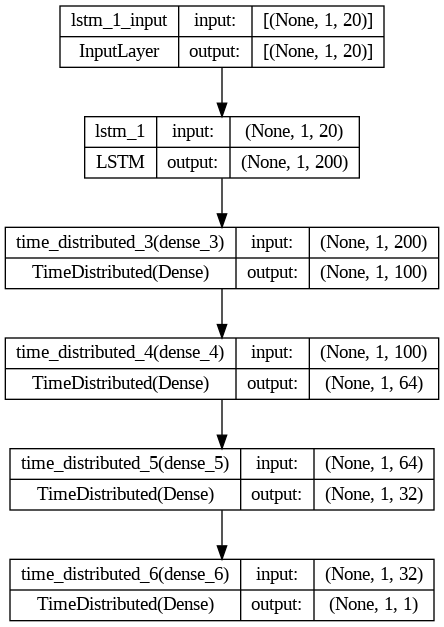

In [ ]:
plot_model(model2, to_file='lstm.png', show_shapes=True, show_layer_names=True)

In [ ]:
model3 = Sequential()
model3.add((LSTM(200, activation='relu', input_shape=(X_train_3.shape[1], X_train_3.shape[2]) , return_sequences=True)))
model3.add(TimeDistributed(Dense(100)))
model3.add(TimeDistributed(Dense(64)))
model3.add(TimeDistributed(Dense(32)))
model3.add(TimeDistributed(Dense(1, activation='linear')))
model3.compile(loss='mse', optimizer='adam')



#model3 = Sequential()
#model3.add(LSTM(200, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
#model3.add(LSTM(100, activation='relu', return_sequences=True))
#model3.add(LSTM(50, activation='relu', return_sequences=True))
#model3.add(TimeDistributed(Dense(1, activation='linear')))
#model3.compile(loss='mse', optimizer='adam')

# define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, mode='min', restore_best_weights=True)
history3=model3.fit(X_train_3, y_train_3, epochs=200, batch_size=16,  validation_split=0.1, verbose=1,callbacks=[early_stopping]) # [y_train_1, y_train_2, y_train_3]

Epoch 1/200
690/690 [==============================] - 8s 7ms/step - loss: 5.3624e-04 - val_loss: 6.5868e-04
Epoch 2/200
690/690 [==============================] - 6s 9ms/step - loss: 2.9248e-04 - val_loss: 6.3608e-04
Epoch 3/200
690/690 [==============================] - 4s 6ms/step - loss: 2.4790e-04 - val_loss: 6.2778e-04
Epoch 4/200
690/690 [==============================] - 5s 8ms/step - loss: 2.5057e-04 - val_loss: 6.2482e-04
Epoch 5/200
690/690 [==============================] - 5s 8ms/step - loss: 2.5281e-04 - val_loss: 8.4664e-04
Epoch 6/200
690/690 [==============================] - 4s 6ms/step - loss: 2.6798e-04 - val_loss: 6.4182e-04
Epoch 7/200
690/690 [==============================] - 6s 9ms/step - loss: 2.3664e-04 - val_loss: 6.1107e-04
Epoch 8/200
690/690 [==============================] - 5s 7ms/step - loss: 2.3852e-04 - val_loss: 5.9889e-04
Epoch 9/200
690/690 [==============================] - 5s 7ms/step - loss: 2.3132e-04 - val_loss: 5.6953e-04
Epoch 10/200
690/69

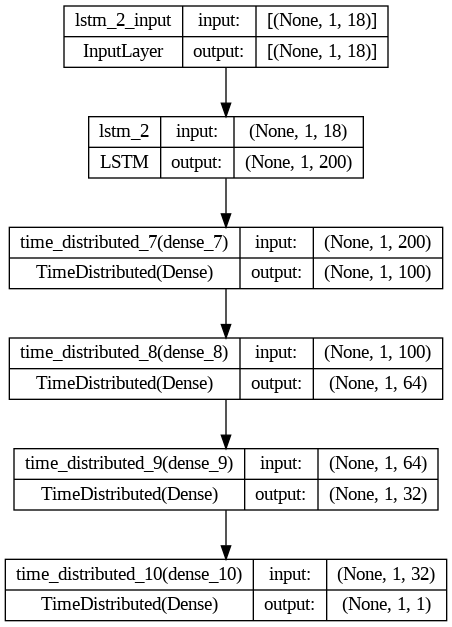

In [ ]:
plot_model(model3, to_file='lstm.png', show_shapes=True, show_layer_names=True)

In [ ]:
#2600/2600 [==============================] - 32s 12ms/step - loss: 0.0092 - val_loss: 0.0250

In [ ]:
y_pred1 = model1.predict(X_test_1)
y_pred2 = model2.predict(X_test_2)
y_pred3 = model3.predict(X_test_3)



165/165 [==============================] - 1s 3ms/step


In [34]:
y_pred_1 = y_pred1.reshape(y_pred1.shape[0], y_pred1.shape[1])
y_pred_2 = y_pred2.reshape(y_pred2.shape[0], y_pred2.shape[1])
y_pred_3 = y_pred3.reshape(y_pred3.shape[0], y_pred3.shape[1])


NameError: ignored

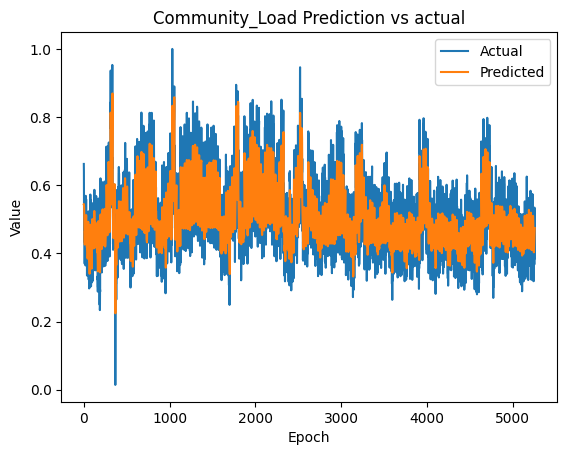

In [ ]:
# Plotting actual values
plt.plot(y_test_1[:, 0], label='Actual')
# Plotting predicted values
plt.plot(y_pred_1, label='Predicted')
plt.title('Community_Load Prediction vs actual')
plt.xlabel('Epoch')

plt.ylabel('Value')
plt.legend()
plt.show()

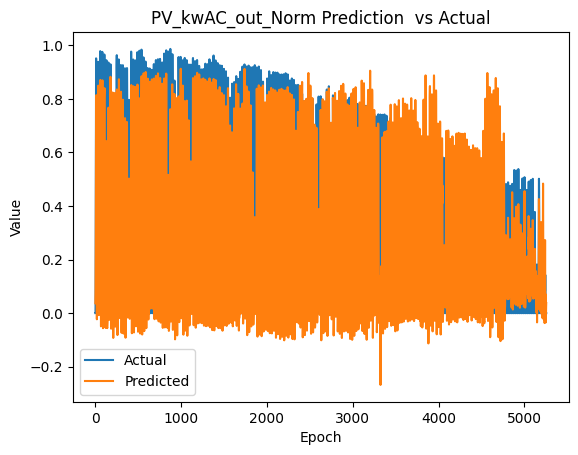

In [ ]:
# Plotting actual values
plt.plot(y_test_2[:, 0], label='Actual')
# Plotting predicted values
#plt.plot(y_pred_1, label='Predicted')
plt.plot(y_pred_2, label='Predicted')
#plt.plot(y_pred_3, label='Predicted')
plt.title('PV_kwAC_out_Norm Prediction  vs Actual')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

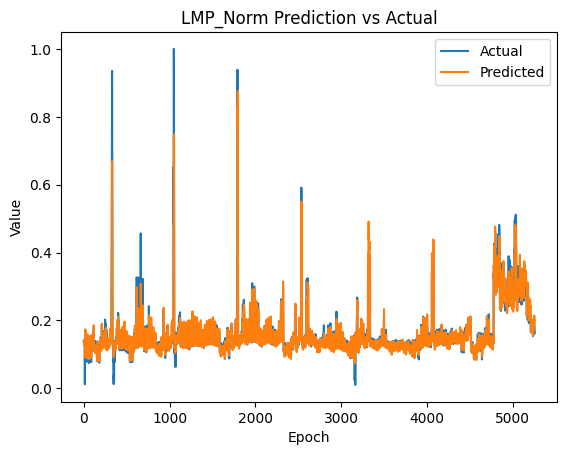

In [ ]:
# Plotting actual values
plt.plot(y_test_3[:, 0], label='Actual')
# Plotting predicted values
#plt.plot(y_pred_1, label='Predicted')
#plt.plot(y_pred_2, label='Predicted')
plt.plot(y_pred_3, label='Predicted')
plt.title('LMP_Norm Prediction vs Actual')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
len(y_test_1[:, 0]), len(y_pred_1[:, 0])

(5255, 5255)

In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

In [ ]:
print(rmse(y_test_1[:, 0],y_pred1[:, 0]))  #0.13705886066421277.  0.13646193141368224. 0.1352447847126911
print(rmse(y_test_2[:, 0],y_pred2[:, 0])) # 0.41853962492521163  0.4298104837134263. #0.4142014733994018 #0.42804806735005346#0.4187976820728239 #0.41445388911935704 #0.40937877766712555 
#0.409516228440801 #0.41284339350699495. #0.39216689949547745 #0.41754422579870726 #0.4143366465499442 #0.4147808795004972 #0.4249056528913976 0.4147831391270594
print(rmse(y_test_3[:, 0],y_pred3[:, 0]))  #0.09389055173159959.  0.0992683738692128. 0.10250393861865395

0.13629735393729855
0.42236407645518753
0.09669614166097248


In [ ]:
print(rmse(y_test_2[:, 0],y_pred2[:, 0]))

0.43871149958920863


In [39]:
def mape(y_true, y_pred):
    diff = np.abs(y_true - y_pred)
    denominator = np.where(y_true != 0, y_true, 1) # handle zero values
    return np.mean(diff / denominator) * 100
mape_score_2 = mape(y_test_2[:, 0],y_pred2[:, 0])
mape_score_2

306.91322439872994

In [ ]:

mape_score_1 = mape(y_test_1[:, 0],y_pred1[:, 0])
mape_score_2 = mape(y_test_2[:, 0],y_pred2[:, 0])
mape_score_3 = mape(y_test_3[:, 0],y_pred3[:, 0])

<ipython-input-48-c060b4775b99>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [ ]:
#rmse(y_test_1[:, 0],y_pred1[:, 0])

In [ ]:
print(mape_score_1)
print(mape_score_2)
print(mape_score_3)

21.870405272407883
inf
28.90636983264161


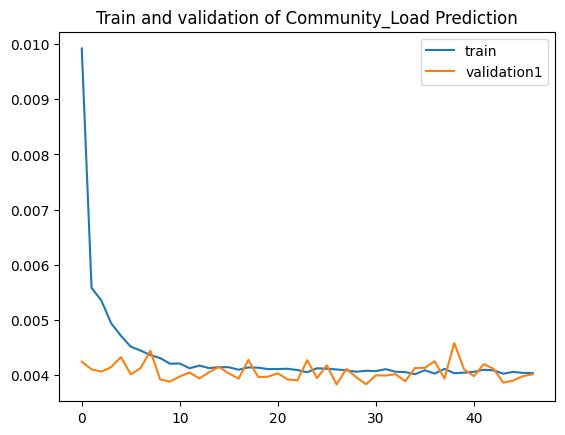

In [ ]:
# plot loss during training
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='validation1')
#plt.plot(history2.history['val_loss'], label='validation2')
#plt.plot(history3.history['val_loss'], label='validation3')
plt.title('Train and validation of Community_Load Prediction')
plt.legend()
plt.show()


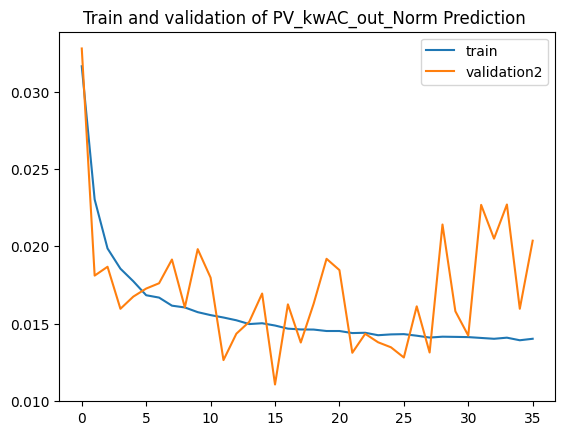

In [ ]:
# plot loss during training
plt.plot(history2.history['loss'], label='train')
#plt.plot(history1.history['val_loss'], label='validation1')
plt.plot(history2.history['val_loss'], label='validation2')
#plt.plot(history3.history['val_loss'], label='validation3')
plt.title('Train and validation of PV_kwAC_out_Norm Prediction ')
plt.legend()
plt.show()

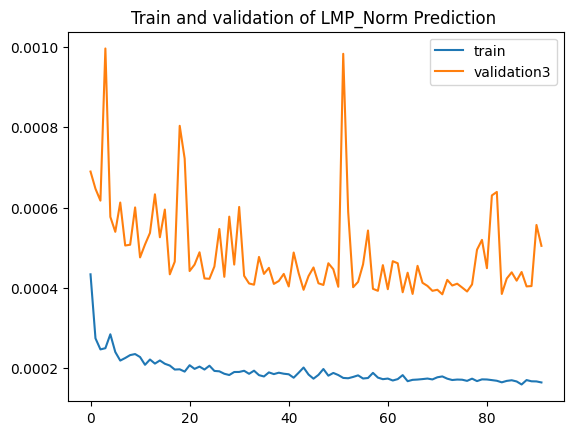

In [ ]:
# plot loss during training
plt.plot(history3.history['loss'], label='train')
#plt.plot(history1.history['val_loss'], label='validation1')
#plt.plot(history2.history['val_loss'], label='validation2')
plt.plot(history3.history['val_loss'], label='validation3')
plt.title('Train and validation of LMP_Norm Prediction ')
plt.legend()
plt.show()

In [ ]:
data2=data

In [ ]:
17520-5255

12265

In [ ]:
y_test_3_df=pd.DataFrame(y_test_3, columns=["predicted_LMP_Norm"])
y_test_2_df=pd.DataFrame(y_test_2, columns=["predicted_PV_kwAC_out_Norm"])
y_test_1_df=pd.DataFrame(y_test_1, columns=["predicted_Community_Load"])

In [ ]:
start_index = 17519-5255 +1

In [ ]:
start_index= 12265

In [ ]:
zero_df_LMP = pd.DataFrame(np.zeros((start_index, 1)), columns=['predicted_LMP_Norm'])
zero_df_PV = pd.DataFrame(np.zeros((start_index, 1)), columns=['predicted_PV_kwAC_out_Norm'])
zero_df_CL = pd.DataFrame(np.zeros((start_index, 1)), columns=['predicted_Community_Load'])

In [ ]:
y_test_3_df=pd.concat([zero_df_LMP,y_test_3_df],axis=0)
y_test_3_df = y_test_3_df.reset_index(drop=True)

y_test_2_df=pd.concat([zero_df_PV,y_test_2_df],axis=0)
y_test_2_df = y_test_2_df.reset_index(drop=True)

y_test_1_df=pd.concat([zero_df_CL,y_test_1_df],axis=0)
y_test_1_df = y_test_1_df.reset_index(drop=True)

In [ ]:
#y_test_1_df[start_index:]

In [ ]:
data3=pd.concat([data2, y_test_3_df, y_test_2_df, y_test_1_df] ,axis=1)
data3

,Time,Congestion_Norm,Small Hydro,Energy_Norm,Loss_Norm,Biogas,Geothermal,Gas Price,Load,Biomass,...,GtiTracking_norm,Zenith_norm,Ghi_norm,solar_system_Curtailment (MWh),LMP_Norm,Community_Load,PV_kwAC_out_Norm,predicted_LMP_Norm,predicted_PV_kwAC_out_Norm,predicted_Community_Load
0,2021-01-01 00:00:00,0.301568,0.042874,0.029449,0.378454,0.827869,0.845406,0.063428,0.462537,0.736842,...,0.0,1.000000,0.0,0.0,0.102169,0.564142,0.0,0.000000,0.0,0.000000
1,2021-01-01 01:00:00,0.301568,0.042572,0.027973,0.378942,0.831967,0.844523,0.063428,0.516118,0.736842,...,0.0,0.953333,0.0,0.0,0.100805,0.453677,0.0,0.000000,0.0,0.000000
2,2021-01-01 02:00:00,0.301568,0.042874,0.028818,0.380648,0.827869,0.844523,0.063428,0.524276,0.741627,...,0.0,0.880000,0.0,0.0,0.101690,0.516479,0.0,0.000000,0.0,0.000000
3,2021-01-01 03:00:00,0.301568,0.044686,0.028287,0.380369,0.827869,0.841873,0.063428,0.509237,0.734450,...,0.0,0.800000,0.0,0.0,0.101175,0.522249,0.0,0.000000,0.0,0.000000
4,2021-01-01 04:00:00,0.301568,0.053140,0.029238,0.381814,0.827869,0.845406,0.063428,0.493290,0.732057,...,0.0,0.720000,0.0,0.0,0.102145,0.574758,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2022-12-31 19:00:00,0.301568,0.065821,0.108320,0.425120,0.877049,0.795936,0.275904,0.448827,0.574163,...,0.0,0.693333,0.0,0.0,0.178786,0.470584,0.0,0.178786,0.0,0.470584
17516,2022-12-31 20:00:00,0.301568,0.064312,0.104586,0.415743,0.877049,0.795053,0.275904,0.453955,0.605263,...,0.0,0.773333,0.0,0.0,0.174785,0.534308,0.0,0.174785,0.0,0.534308
17517,2022-12-31 21:00:00,0.301568,0.062500,0.099013,0.409350,0.877049,0.795053,0.275904,0.455645,0.684211,...,0.0,0.853333,0.0,0.0,0.169210,0.402862,0.0,0.169210,0.0,0.402862
17518,2022-12-31 22:00:00,0.301568,0.060688,0.093832,0.401280,0.864754,0.795053,0.275904,0.459283,0.686603,...,0.0,0.926667,0.0,0.0,0.163917,0.470848,0.0,0.163917,0.0,0.470848


In [ ]:
data3.to_csv('output_of_LSTM.csv', index=True)